# Laboratory practice 2.1: Introduction to ML techniques
# Preparing the dataset

For this practice, you will need the following dataset:

- **SimData.dat**: synthetic datasets containing several input variables and one output variable **Y**.

One of the core packages for machine learning in Python is **scikit-learn**. However, most of the time you *will not be so lucky as to use it* other than to check your answers, since the main idea here is that **you** learn how to code each method and how/why it works. *This goes both for different algorithms as well as preprocessing and analysis techniques*.

Further reading on the scikit-learn library (this will be your best friend in the near future, but again, for now is just for reference):
- [scikit-learn](https://scikit-learn.org)

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Plotting (you do not have to use both, you can choose one or the other if you feel confortable):
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)


---

In [1]:
# Load the necessary modules

# plotting libraries (you can use only one, for example plt)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries (you'll need both here)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries (just so you see how some things can be done, although you may not use it too much)
from sklearn.model_selection import train_test_split

---

## STEP 1: IMPORT DATASET

In [2]:
# For starters, load the dataset here into a pandas dataframe called "df" and check the first rows with .head()
import pandas
df = pd.read_csv("SimData.dat", sep="\t")
df.head()

,X1,X2,Y
0,-64.170401,NaN,NO
1,604.457235,-4.703332,YES
2,492.688339,-0.493488,YES
3,438.040887,-2.307669,NO
4,184.349042,2.680303,NO


Is it a regression or a classification problem? Take into account that the target variable is "Y"

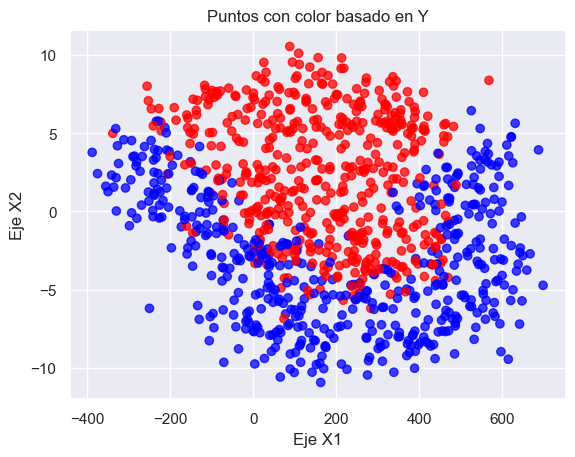

Es un problema de clasificación


In [3]:
# Taking into account the shape of the dataset, plot it so that you can get acquainted with the data
# Make sure every class is distinguished using different colors and/or shapes in the plot
# Definir colores personalizados
color_dict = {'NO': 'red', 'YES': 'blue', np.nan:'white'}

# Asignar colores a cada punto según su categoría
colors = [color_dict[label] for label in df["Y"]]

plt.scatter(df["X1"], df["X2"], color=colors, alpha=0.75)

plt.xlabel("Eje X1")
plt.ylabel("Eje X2")
plt.title("Puntos con color basado en Y")

# Mostrar la gráfica
plt.show()

print("Es un problema de clasificación")

## STEP 2: CHECK OUT THE MISSING VALUES

In [4]:
# Are there any missing values? How many? Where? 
df.isna().sum()

X1    2
X2    3
Y     1
dtype: int64

In [5]:
# In this case we will simply remove the missing values by removing the rows with NAs. Do this here.
df = df.dropna()
# Check results. Was your removal succesful?
df.isna().sum()

X1    0
X2    0
Y     0
dtype: int64

## STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [6]:
# Check your main statistics for the data variables and see if everything is clear
print("X1")
print(f"Media: {df['X1'].mean()}, Moda: {df['X1'].mode().to_list()[0]}, Mediana: {df['X1'].median()}")

print("X2")
print(f"Media: {df['X2'].mean()}, Moda: {df['X2'].mode().to_list()[0]}, Mediana: {df['X2'].median()}")

X1
Media: 183.23365617787147, Moda: -388.23136026, Mediana: 180.989524175
X2
Media: -0.3483257202048193, Moda: -10.93612428, Mediana: -0.416657212


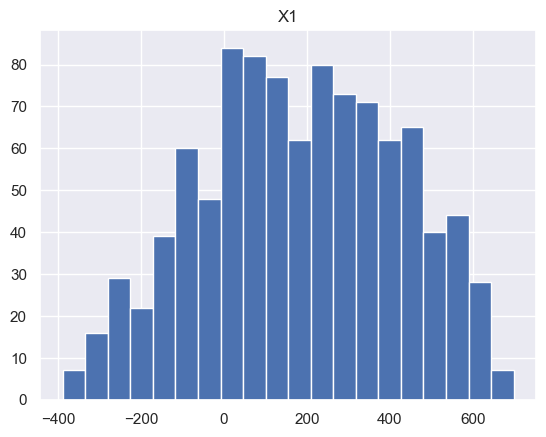

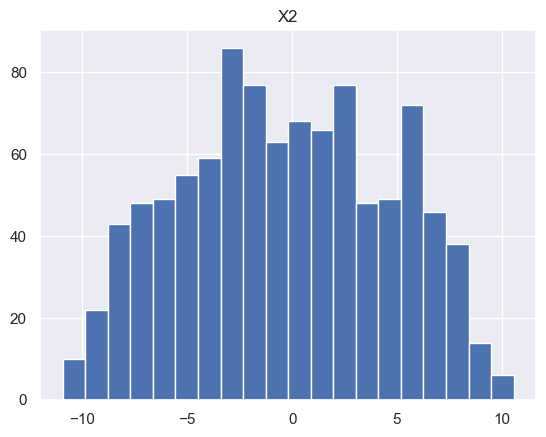

In [7]:
# Plotting is a good way to get to know the data. Do a histogram for each variable to see its behavior.
# Do you see any potential outliers you should take care of?
plt.hist(df["X1"], bins=20)
plt.title("X1")

plt.show()

plt.hist(df["X2"], bins=20)
plt.title("X2")

plt.show()

## STEP 4: ENCODE CATEGORICAL VARIABLES

In [8]:
# Are there any categorical input variables? If unsure, check it
type(df["Y"].tolist()[0])

str

In [9]:
# Convert output variable to a factor (other types of numeric values are okay as well, but we will use this here)
dict_tipos = {'NO': 0, 'YES': 1}
df["Y"] = [dict_tipos[valor] for valor in df["Y"]]
df["Y"]

1      1
2      1
3      0
4      0
5      1
      ..
995    0
996    0
997    0
998    1
999    1
Name: Y, Length: 996, dtype: int64

## STEP 5: Standardize the numerical variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


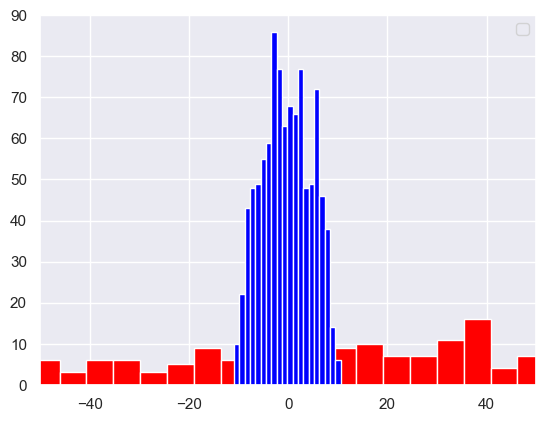

In [10]:
# Are the numerical variables in the same scale? If unsure, check it
plt.hist(df["X1"], bins=200, color="red")
plt.hist(df["X2"], bins=20, color="blue")
plt.xlim(-50, 50)
plt.ylim(0, 90)
plt.legend()

plt.show()

The standardization should be done **after** we perform the train/test split, using only the mean and variance for the training dataset. In this case however, we will forget about this and just do it here, although this is something to keep in mind.

In [11]:
# Standardize the numerical variables. 
# Watch out!: Save the mean and variance so you can undo de standardization anytime you want to
mean_x1 = df["X1"].mean()
mean_x2 = df["X2"].mean()
var_x1 = df["X1"].var()
var_x2 = df["X2"].var()

df["X1"] = (df["X1"] - mean_x1)/var_x1
df["X2"] = (df["X2"] - mean_x2)/var_x2

In [12]:
# Check if your process worked
print("X1")
print(f"Media: {df['X1'].mean()}, Varianza:{df['X1'].var()}")

print("X2")
print(f"Media: {df['X2'].mean()}, Varianza:{df['X2'].var()}")

X1
Media: 4.040721349664852e-19, Varianza:1.7579015852761553e-05
X2
Media: 8.917454013053465e-19, Varianza:0.04098215365354619


## STEP 6: EXPLORATORY ANALYSIS
Inside the exploratory analysis, feel free to play with the data to get to know it further. Some of the best ways to do so is plotting it, showing the correlation plot of numeric variables, etc.

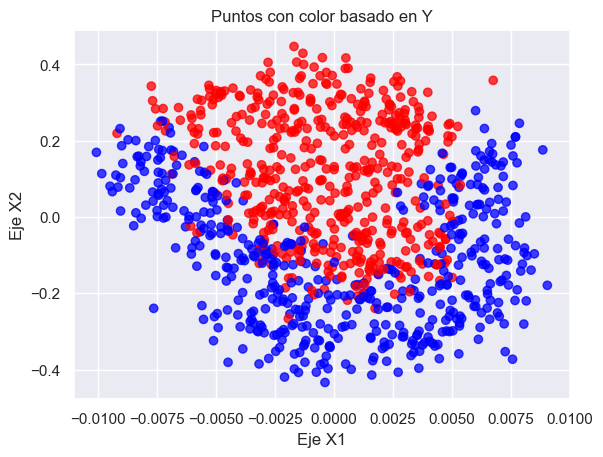

In [13]:
# Do again the scatterplot for the dataset, but now with the processed version
color_dict = {0: 'red', 1: 'blue'}

# Asignar colores a cada punto según su categoría
colors = [color_dict[label] for label in df["Y"]]

plt.scatter(df["X1"], df["X2"], color=colors, alpha=0.75)

plt.xlabel("Eje X1")
plt.ylabel("Eje X2")
plt.title("Puntos con color basado en Y")

# Mostrar la gráfica
plt.show()

In [14]:
# One idea: perform a scatterplot where you face each variable against each other (all vs. all)



In [15]:
# Obtain and plot the correlation matrix 
# For this, you may want to use the .corr() method in pandas
df.corr()

,X1,X2,Y
X1,1.000000,-0.189912,0.070976
X2,-0.189912,1.000000,-0.559032
Y,0.070976,-0.559032,1.000000


In [16]:
# Feel free to try any other exploration methods here!

## STEP 7: CHECK OUT FOR CLASS IMBALANCES

Are both classes balanced or not?

In [17]:
# Count instances for each class
print(df["Y"].value_counts())
print("Están balanceadas")

1    499
0    497
Name: Y, dtype: int64
Están balanceadas


If both classes are kind of similar in number, you can consider the dataset _balanced_

## STEP 8: SPLIT THE DATA INTO TRAINING AND TEST SETS

Now, this is a critical point, and you should watch out here. Doing this properly is not difficult, but mistakes are expensive in this step! (and also you most likely will not notice them until much later, when it's already very far too late)

In [18]:
# Define input and output variables
input_variables = np.array(["X1", "X2"])
output_variables = np.array(["Y"])

In [19]:
# First: Shuffle the data (check out the .sample() method in pandas)
df = df.sample(frac=1).reset_index(drop=True)

# Then, separate the inputs, stored in "X" (pd.dataframe) from the target variable, stored in "y" (pd.series)
df_x = df[["X1", "X2"]]
df_x

,X1,X2
0,-0.002943,-0.303570
1,0.001095,-0.216330
2,-0.002507,0.060624
3,-0.002297,-0.191160
4,-0.001815,0.154519
...,...,...
991,-0.003096,0.369944
992,0.001002,0.235007
993,-0.007138,0.248801
994,-0.000719,-0.121514


Now for the crucial part: Separate the train and test datasets. 

For now, consider only train/test (forget the validation dataset) and make it so that the training set contains 80% of the data and the test set the remaining 20%


In [20]:
# How many rows will the training dataset have?
print(996*0.8)


796.8000000000001


In [21]:
# Perform the split
df_train = df[:796]
df_test = df[796:].reset_index(drop=True)
df_test, df_train

(           X1        X2  Y
 0   -0.000108 -0.015582  0
 1   -0.007220  0.284189  0
 2    0.001657 -0.132135  0
 3   -0.000489  0.097226  0
 4    0.004509 -0.077380  0
 ..        ...       ... ..
 195 -0.003096  0.369944  0
 196  0.001002  0.235007  0
 197 -0.007138  0.248801  0
 198 -0.000719 -0.121514  0
 199  0.002172  0.246892  0
 
 [200 rows x 3 columns],
            X1        X2  Y
 0   -0.002943 -0.303570  1
 1    0.001095 -0.216330  1
 2   -0.002507  0.060624  0
 3   -0.002297 -0.191160  1
 4   -0.001815  0.154519  0
 ..        ...       ... ..
 791  0.005945 -0.234187  1
 792 -0.003523  0.117998  0
 793  0.004966 -0.082185  1
 794 -0.007426  0.117197  1
 795  0.005370 -0.165802  1
 
 [796 rows x 3 columns])

Train:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


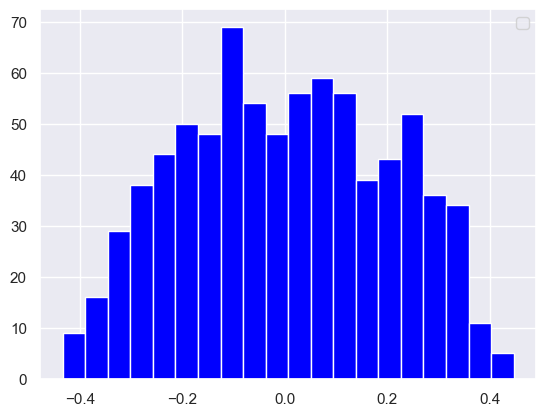

Test:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


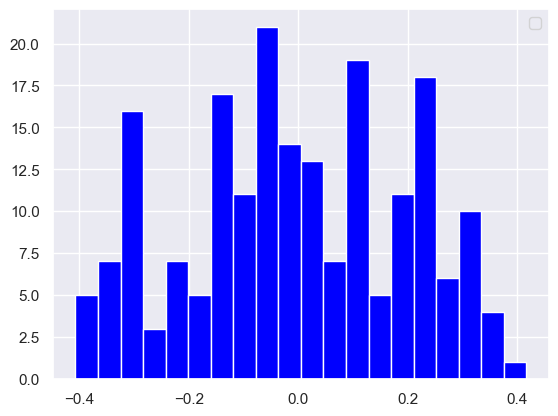

In [22]:
# Check whether the shape of all dataframes is correct
print("Train:")
plt.hist(df_train["X1"], bins=200, color="red")
plt.hist(df_train["X2"], bins=20, color="blue")
plt.legend()
plt.show()

print("Test:")
plt.hist(df_test["X1"], bins=2000, color="red")
plt.hist(df_test["X2"], bins=20, color="blue")
plt.legend()

plt.show()

In [23]:
# See how convenient sklearn becomes here, for example...
'''
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  # percentage of test data
                                                    random_state=0, # seed for replication
                                                    stratify = y)   # Preserves distribution of y
'''

'\nX_train, X_test, y_train, y_test = train_test_split(X, y,\n                                                    test_size=0.2,  # percentage of test data\n                                                    random_state=0, # seed for replication\n                                                    stratify = y)   # Preserves distribution of y\n'

### 8.1 - Plot the train and test datasets
We'll do this simple check to see if everything looks fine here

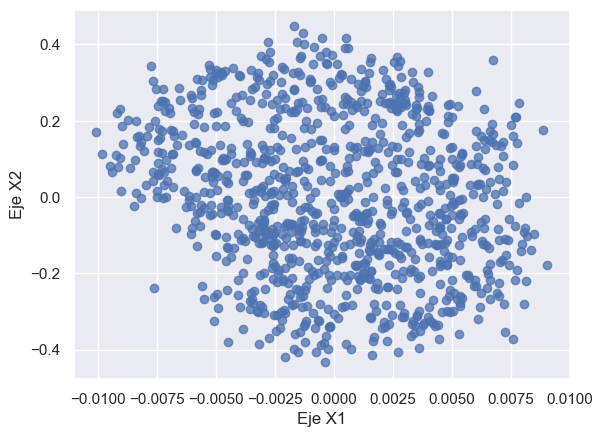

In [24]:
# To make plotting easier, group together train data and test data
df_plot = pd.concat([df_train, df_test])


# Plot the train and test datasets
plt.scatter(df_plot["X1"], df_plot["X2"], alpha=0.75)

plt.xlabel("Eje X1")
plt.ylabel("Eje X2")

# Mostrar la gráfica
plt.show()

In [25]:
# Store the train and test datasets to use it later
df_train.to_csv("train.dat", sep = "\t", index = False)
df_test.to_csv("test.dat", sep = "\t", index = False)

### **We are all set!** 

You can continue to the next practice, to start applying your first ML algorithm to the data: _K-nearest neighbors_

Also: any further checks of processing you think you need, feel free to try here!